In [45]:
import pandas as pd
import seaborn as sns
import seaborn.objects as so
from janitor import clean_names

In [46]:
# Path
path = "../"

# Read the data
df = pd.read_csv(path + "output/ZX05/CF costs.csv")
df = clean_names(df)

# Change data type
df["costctr"] = df["costctr"].astype(str)

In [47]:
# Filter primary costs
primary_costs = [
    "299 Total Labor Costs",
    "465 Cost of materials",
    "535 Services In/Out",
]
df = df[df["acc_lv2"].isin(primary_costs)]

In [48]:
# Select columns
id_cols = [
    "fy",
    "period",
    "costctr",
    "gl_accounts",
    "profitctr",
    "fix_var",
    "department",
    "acc_lv2",
]
numeric_cols = [
    "plan",
    "actual",
    # "target",
    "delta_to_plan",
]
df = df[id_cols + numeric_cols]

In [49]:
# Change sign logic
df[numeric_cols] = df[numeric_cols] * -1e3
df["delta_to_plan"] = df["delta_to_plan"] * -1

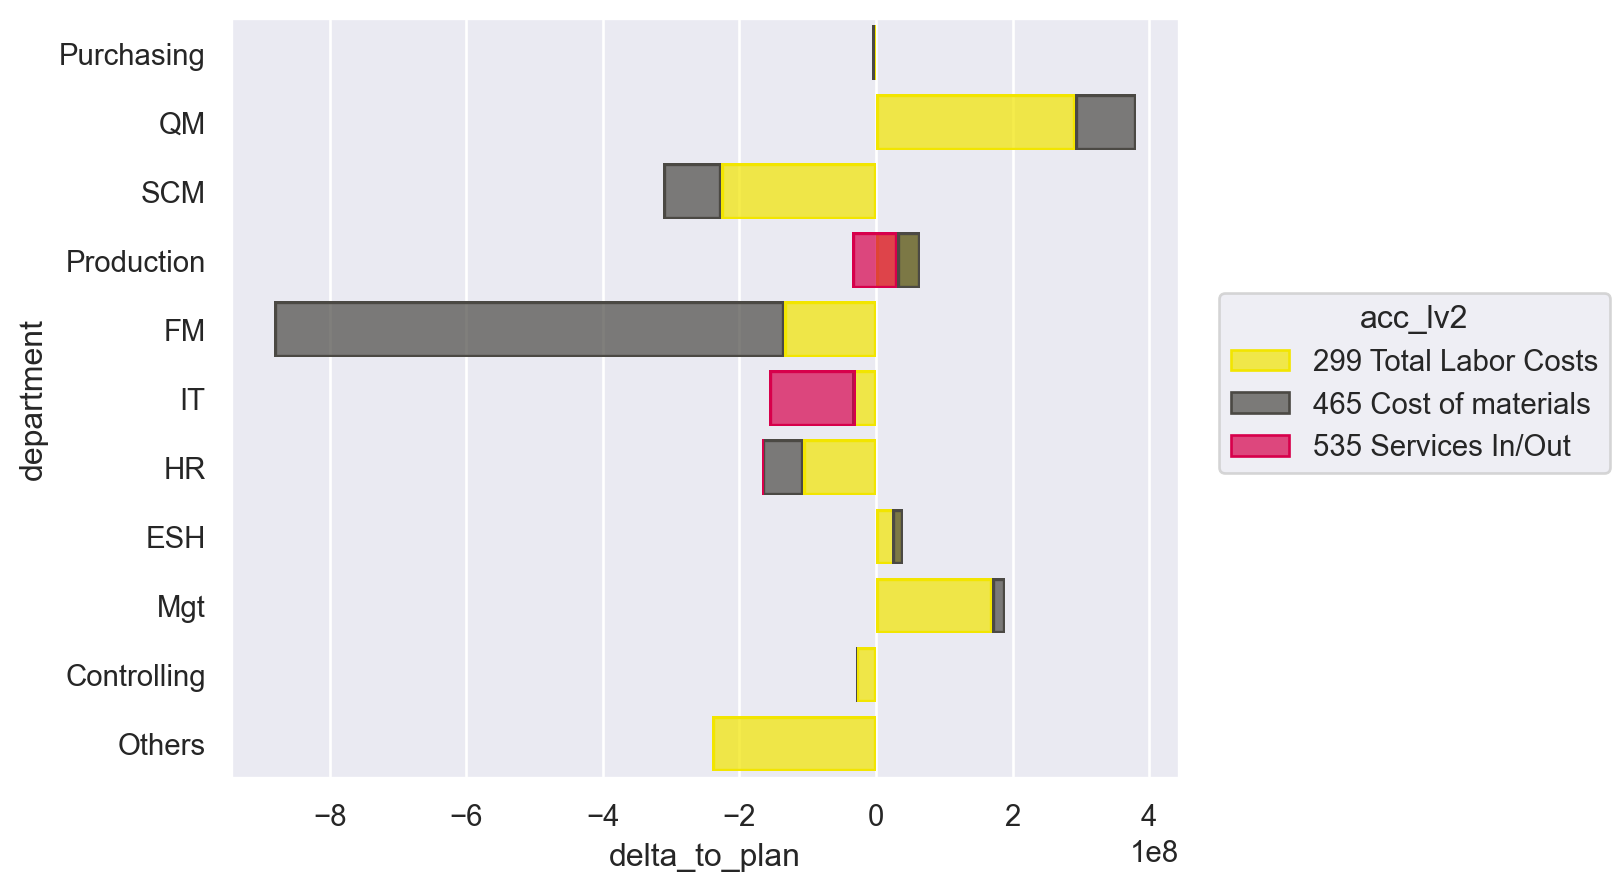

In [50]:
(
    so.Plot(df, x="delta_to_plan", y="department", color="acc_lv2")
    .add(so.Bar(), so.Agg("sum"), so.Stack())
    .scale(color=("#F2E500", "#4A4944", "#D7004B"))
)

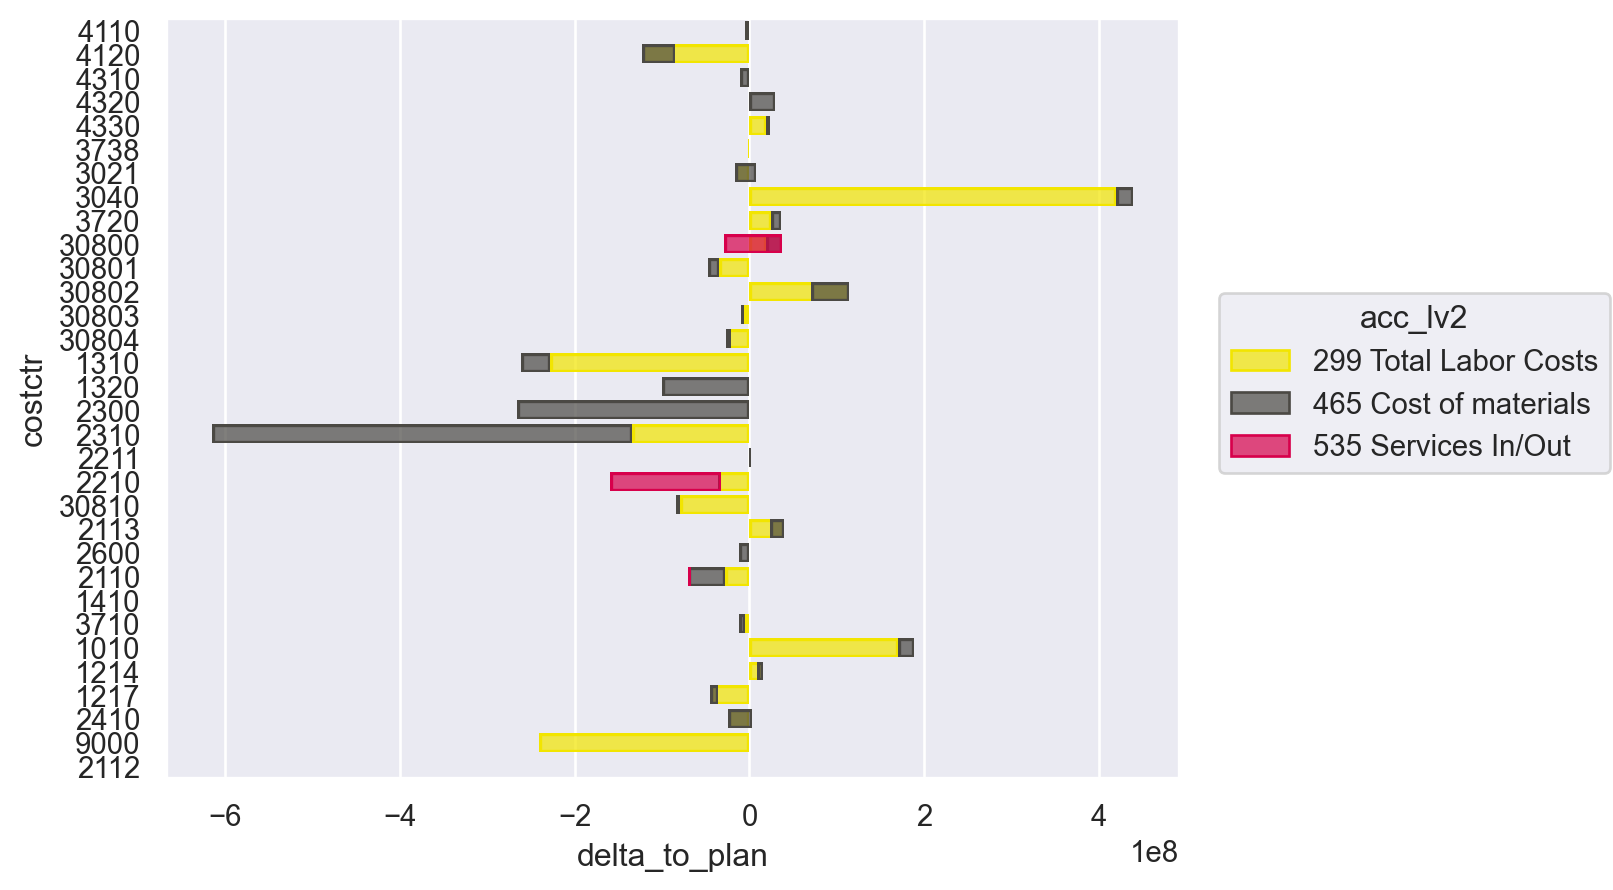

In [51]:
(
    so.Plot(df, x="delta_to_plan", y="costctr", color="acc_lv2")
    .add(so.Bar(), so.Agg("sum"), so.Stack())
    .scale(color=("#F2E500", "#4A4944", "#D7004B"))
)

In [ ]:
# Summarize the data
df = df.groupby(id_cols).sum().reset_index()

top_10_negative = df.sort_values("delta_to_plan").head(10)
top_10_positive = df.sort_values("delta_to_plan").tail(10)